In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_name="C:\\Users\\S Nikitha\\Downloads\\Visadataset - Visadataset.csv"
visa_dataset=pd.read_csv(file_name)

In [4]:
wage_data=visa_dataset['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

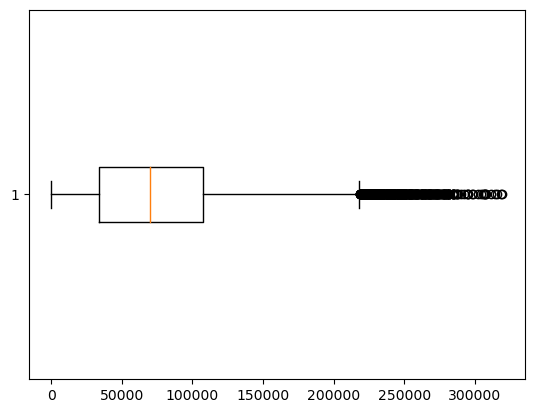

In [26]:
plt.boxplot(wage_data,vert=False)
plt.show()

# Outliers_data

In [5]:
Q1=round(np.quantile(wage_data,0.25),2)
Q2=round(np.quantile(wage_data,0.50),2)
Q3=round(np.quantile(wage_data,0.75),2)
IQR=(Q3-Q1)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

con1=wage_data<LB
con2=wage_data>UB
con1|con2
outliers_data=visa_dataset[con1|con2]

In [28]:
outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [6]:
len(outliers_data)

427

In [7]:
(len(outliers_data)/len(visa_dataset))*100

1.6758241758241759

In [31]:
427/25480

0.016758241758241758

In [ ]:
#Methods to deal with outliers
1> Remove the outliers
- If outliers percentage <=2% then remove the outliers
- 98% data will be avaiable , that is enough to train the data

2> Fill the outliers
- Outliers will be affected by mean value
- So fill outliers with meadian value
- Outliers can cap with > Q3 value with Q3
                        < Q1 value with Q1

# Non_outliers data:

In [8]:
Q1=round(np.quantile(wage_data,0.25),2)
Q2=round(np.quantile(wage_data,0.50),2)
Q3=round(np.quantile(wage_data,0.75),2)
IQR=(Q3-Q1)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

# Removing of outliers
con1=wage_data>LB
con2=wage_data<UB
con1&con2
non_outliers_data=visa_dataset[con1&con2]

In [9]:
non_outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [10]:
len(non_outliers_data)

25053

In [ ]:
#visa_dataset= 25480
#outliers_data=427
#not_outliers_data=25480-427= 25053

# Fill outliers data with Median Values

In [35]:
visa_dataset['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

# Method-1:

- Step:1 Fill outliers data with median value
- Step-2: Merge Two data frames non outliers and outliers data

- We separated non outliers(25053) and outliers data(427)
-  Fill the prevailing_wage values of outliers(427) with median of original values
- Then combine both non outliers(25053) and  filled outliers with median data(427)==> 25480

In [55]:
median_wage=visa_dataset['prevailing_wage'].median()
median_wage

70308.20999999999

In [ ]:
# Method -2
20000- present in outliers then replace with median

In [ ]:
outliers_data=outliers_data['prevailing_wage'].to_list()

In [ ]:
outliers_data['prevailing_wage'].to_list()

# Iterate the original visa_dataset whenever the value is match with list of values
# then replace that value with  median

In [19]:
actual_wage=visa_dataset['prevailing_wage'].to_list()
outlier_wage=outliers_data['prevailing_wage'].to_list()
for i in actual_wage:
    if i in outlier_wage:
        outlier_wage.remove(i)
        outlier_wage.append(median_wage)

outlier_wage

[70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,
 70308.20999999999,


# 31-08-2023

# Impute Outliers with median

# **np.where**

In [ ]:
- It asks some condition

In [ ]:
if <condition>:
    # st1
    # st2

else:
    # st1
    
np.where(<condition>,a,b) ## this single line performs the if and else stmt work
## if the condition is true then "a" will be executed else "b" will be executed

In [ ]:
outliers<lower_bound,median(whenever outliers<Lb will be impute with the median value)else(same)
outlier>upper_bound same for both

In [11]:
Q1=round(np.quantile(wage_data,0.25),2)
Q2=round(np.quantile(wage_data,0.50),2)
Q3=round(np.quantile(wage_data,0.75),2)
IQR=(Q3-Q1)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

visa_dataset['prevailing_wage']<LB #(outliers)
#visa_dataset[visa_dataset['prevailing_wage']<LB] ## no value is coming
#LB = -76564.565

visa_dataset[visa_dataset['prevailing_wage']>UB] ## OUTLIERS
cond=visa_dataset['prevailing_wage']>UB
median=visa_dataset['prevailing_wage'].median()

np.where(cond,median,visa_dataset['prevailing_wage'])

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [12]:
df=pd.DataFrame(zip([1,2,3],['A','B','C']),columns=['Col1','Col2'])
df                

,Col1,Col2
0,1,A
1,2,B
2,3,C


In [13]:
# want to replace the col1 where ever >2 value shld be 100

In [14]:
cond=df['Col1']>2
#cond
df['Col1']=np.where(cond,100,df['Col1']) # writing into col1
df


,Col1,Col2
0,1,A
1,2,B
2,100,C


In [24]:
df

,Col1,Col2
0,1,A
1,2,B
2,3,C


In [26]:
cond=df['Col2']=='A'
df['Col1']=np.where(cond,100,df['Col1'])
df

,Col1,Col2
0,100,A
1,2,B
2,3,C


In [15]:
## filling outliers with median
cond=visa_dataset['prevailing_wage']>UB
median=visa_dataset['prevailing_wage'].median()
visa_dataset['prevailing_wage']=np.where(cond,median,visa_dataset['prevailing_wage'])
visa_dataset['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476     70308.2100
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [16]:
df['Col2']=='A'

0     True
1    False
2    False
Name: Col2, dtype: bool

In [17]:
cond=df['Col1']>2 ## str(col1) is not compare with int(2)
df['Col1']=np.where(cond,100,df['Col1'])
df

,Col1,Col2
0,1,A
1,2,B
2,100,C
